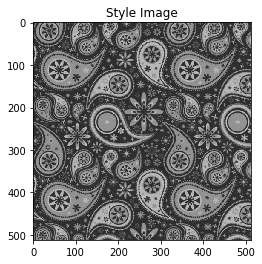

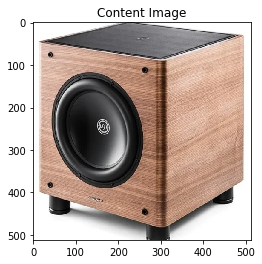

In [1]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from styleTransfer import StyleTransfer
from PIL import Image
import torch

style =  './style.jpg'
content = './orig.webp'

unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

imsize = 512
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated

def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)
style_img = image_loader(style)
content_img = image_loader(content)

plt.figure()
imshow(style_img, title='Style Image')
plt.ioff()
plt.show()

plt.figure()
imshow(content_img, title='Content Image')
plt.ioff()
plt.show()



Building the style transfer model..
Optimizing..


/home/muaddib/Documents/DL/DLSProject/styleTransfer.py:100: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/home/muaddib/Documents/DL/DLSProject/styleTransfer.py:101: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


run [50]:
Style Loss : 0.000313 Content Loss: 0.001369

run [100]:
Style Loss : 0.000087 Content Loss: 0.001111

run [150]:
Style Loss : 0.000087 Content Loss: 0.001111

run [200]:
Style Loss : 0.000087 Content Loss: 0.001111

run [250]:
Style Loss : 0.000087 Content Loss: 0.001111

run [300]:
Style Loss : 0.000087 Content Loss: 0.001111



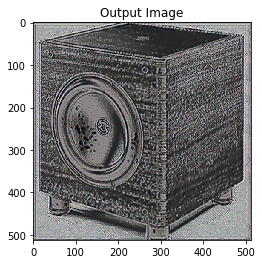

In [3]:
out = StyleTransfer(style, content).getOutput()
imshow(out, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

In [12]:
out[0].shape
img = transforms.ToPILImage(mode='RGB')(out.cpu()[0])
img.save('/home/muaddib/Documents/DL/DLSProject/res.jpg')

In [4]:
StyleTransfer(style, content).getOutput(content_img.clone())

torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])
Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 173.436569 Content Loss: 21.776855

run [100]:
Style Loss : 65.397720 Content Loss: 23.155197

run [150]:
Style Loss : 35.335758 Content Loss: 23.607788

run [200]:
Style Loss : 18.862572 Content Loss: 23.555088

run [250]:
Style Loss : 9.859259 Content Loss: 22.960981

run [300]:
Style Loss : 6.103650 Content Loss: 22.180302



tensor([[[[0.5989, 0.4686, 0.6783,  ..., 0.4636, 0.4162, 0.6093],
          [0.5608, 0.7049, 0.7339,  ..., 0.4303, 0.2854, 0.4350],
          [0.6666, 0.6483, 0.6918,  ..., 0.7865, 0.5255, 0.4037],
          ...,
          [0.8386, 0.4521, 0.4942,  ..., 0.8409, 0.7644, 0.5616],
          [0.8681, 0.2983, 0.2183,  ..., 0.6995, 0.7211, 0.5257],
          [1.0000, 0.6216, 0.2501,  ..., 0.6543, 0.8015, 0.6815]],

         [[0.3337, 0.2399, 0.4716,  ..., 0.3491, 0.2911, 0.3447],
          [0.2931, 0.7141, 0.8632,  ..., 0.5146, 0.4155, 0.3240],
          [0.4112, 0.6108, 0.7354,  ..., 0.7563, 0.6495, 0.2774],
          ...,
          [0.8571, 0.4199, 0.4403,  ..., 0.8137, 0.7760, 0.3428],
          [0.8449, 0.2326, 0.1887,  ..., 0.9205, 0.8663, 0.3675],
          [0.9271, 0.5175, 0.0714,  ..., 0.5732, 0.6398, 0.4504]],

         [[0.6037, 0.5630, 0.5370,  ..., 0.4151, 0.3569, 0.3746],
          [0.5011, 0.7947, 0.7098,  ..., 0.4650, 0.3750, 0.3009],
          [0.5256, 0.6888, 0.7085,  ..., 0

In [4]:
import torch.nn as nn

In [5]:
class SimpleCnn(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer1ChanelNum = 64
        self.layer2ChanelNum = 128
        self.layer3ChanelNum = 256
        self.layer4ChanelNum = 512
        self.linLayerChanelNum = 4096

        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=self.layer1ChanelNum, kernel_size=3),                 # 0
            nn.ReLU(inplace=True),                                                                      # 1
            nn.Conv2d(self.layer1ChanelNum, out_channels=self.layer1ChanelNum, kernel_size=3),          # 2
            nn.ReLU(inplace=True),                                                                      # 3
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),              # 4
            nn.Conv2d(self.layer1ChanelNum, out_channels=self.layer2ChanelNum, kernel_size=3),          # 5
            nn.ReLU(inplace=True),                                                                      # 6
            nn.Conv2d(self.layer2ChanelNum, out_channels=self.layer2ChanelNum, kernel_size=3),          # 7
            nn.ReLU(inplace=True),                                                                      # 8
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),              # 9
            nn.Conv2d(self.layer2ChanelNum, out_channels=self.layer3ChanelNum, kernel_size=3),          # 10
            nn.ReLU(inplace=True),                                                                      # 11
            nn.Conv2d(self.layer3ChanelNum, out_channels=self.layer3ChanelNum, kernel_size=3),          # 12
            nn.ReLU(inplace=True),                                                                      # 13
            nn.Conv2d(self.layer3ChanelNum, out_channels=self.layer3ChanelNum, kernel_size=3),          # 14
            nn.ReLU(inplace=True),                                                                      # 15
            nn.Conv2d(self.layer3ChanelNum, out_channels=self.layer3ChanelNum, kernel_size=3),          # 16
            nn.ReLU(inplace=True),                                                                      # 17
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),              # 18
            nn.Conv2d(self.layer3ChanelNum, out_channels=self.layer4ChanelNum, kernel_size=3),          # 19
            nn.ReLU(inplace=True),                                                                      # 20
            nn.Conv2d(self.layer4ChanelNum, out_channels=self.layer4ChanelNum, kernel_size=3),          # 21
            nn.ReLU(inplace=True),                                                                      # 22
            nn.Conv2d(self.layer4ChanelNum, out_channels=self.layer4ChanelNum, kernel_size=3),          # 23
            nn.ReLU(inplace=True),                                                                      # 24
            nn.Conv2d(self.layer4ChanelNum, out_channels=self.layer4ChanelNum, kernel_size=3),          # 25
            nn.ReLU(inplace=True),                                                                      # 26
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),              # 27
            nn.Conv2d(self.layer4ChanelNum, out_channels=self.layer4ChanelNum, kernel_size=3),          # 28
            nn.ReLU(inplace=True),                                                                      # 29
            nn.Conv2d(self.layer4ChanelNum, out_channels=self.layer4ChanelNum, kernel_size=3),          # 30
            nn.ReLU(inplace=True),                                                                      # 31
            nn.Conv2d(self.layer4ChanelNum, out_channels=self.layer4ChanelNum, kernel_size=3),          # 32
            nn.ReLU(inplace=True),                                                                      # 33
            nn.Conv2d(self.layer4ChanelNum, out_channels=self.layer4ChanelNum, kernel_size=3),          # 34
            nn.ReLU(inplace=True),                                                                      # 35
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),              # 36
        )

    def forward(self, x):
        x = self.net(x)
        return x

In [7]:
cnn = SimpleCnn().to("cuda").eval()

In [16]:
for layer in cnn.net.children():
    print(layer)


Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
ReLU(inplace=True)
